Titanic Exploratory Data Analysis

In [62]:
import pandas as pd
import plotly_express as px
import seaborn as sns

Step 1

Read the file train.csv into Python and print a few rows.

In [23]:
df = pd.read_csv('data/train.csv', sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


<AxesSubplot:xlabel='Survived'>

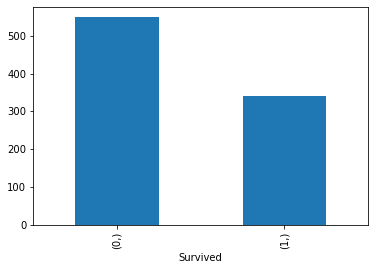

In [30]:
df[['Survived']].value_counts().plot.bar()

Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [76]:
df[df['Pclass'] == 1]['Survived'].value_counts(normalize = True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [ ]:
df.groupby

Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


<AxesSubplot:xlabel='Sex', ylabel='count'>

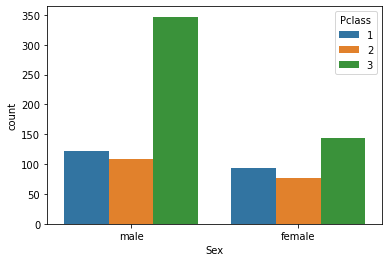

In [70]:
sns.countplot(x='Sex', hue = 'Pclass', data = df)


In [37]:
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
len(df[df['Pclass'] == 1])

216

Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

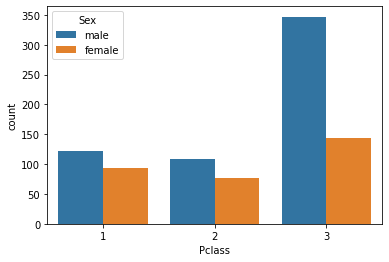

In [63]:
sns.countplot(x="Pclass",hue="Sex",data=df)

Step 5

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<AxesSubplot:xlabel='Age', ylabel='Count'>

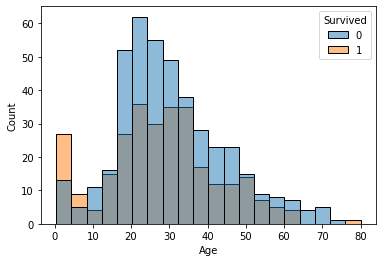

In [64]:
sns.histplot(x="Age",hue="Survived",data=df)

Step 6

Calculate the average age for survived and drowned passengers separately.

In [74]:
df.groupby('Survived').Age.mean()


Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

Step 7

Replace missing age values by the mean age.

In [68]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [67]:
df.groupby(['Pclass' , 'Survived', 'Sex']).size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64